# 2022 Kenyan General Elections Through Tweets

## An NLP project-approach

Kenya, an East African country, will be conducting a general elections this year- August 9th, 2022. This mini project aims to understand the Kenyan people sentiments on elections-related topics with the goal of getting an insight in which presidential candidate is highly favoured and likely to clinch victory.

Summary on Kenya Demographic:
https://dhsprogram.com/pubs/pdf/OD71/OD71.pdf


Data is acquired from Twitter, a social platform that has gained popularit by masses in Kenya (.. and globally), by web-scrapping using `Twint library`.
    

- Data (Tweets) limit set to `5 million tweets`. 
    
##### Scrapping Library Choice Summary: 
- Twint has unlimited scrapping capability unlike proprietary Twitter API `Tweepy` that requires API request and developer account. Tweepy API limit scrapping to only 3200 tweets.

- In this mini project, I will utelize Twint scrapping tool.

In [1]:
# Import twint API
import twint

# asynchronous runtime import (allows run untill complete before returning results)
import nest_asyncio
nest_asyncio.apply()

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import json
import string

# NLP imports
from nltk import (sent_tokenize, word_tokenize)
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

from wordcloud import WordCloud

# Set default plt size
plt.rcParams['figure.figsize'] = (13.0, 9.0)

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Datetime import
import datetime


In [2]:
# Configure object


def get_kenya_elections_tweets(use_cache = True):
    
    raw_tweets =  'kenyan_2022_elections_sentiments.csv'
    
    if os.path.exists(raw_tweets) and use_cache:
        
        print('Reading local csv file..')
        
        return pd.read_csv(raw_tweets)
    else: 
        current_date = datetime.datetime.now()
        current_end_date = current_date + datetime.timedelta(days=1)
        
        config = twint.Config()
        config.Search = ["kenya elections 2022"] 
        config.Lang = "en"
        config.Limit = 5_000_000
        config.Store_csv = True
        config.Output = raw_tweets
        print('Running search...')
        twint.run.Search(config)
        
        config.Since = current_date.strftime("%Y-%m-%d")
        config.Until = current_end_date.strftime("%Y-%m-%d")
        current_date = current_end_date
        current_end_date += datetime.timedelta(days=1)
        return pd.read_csv(raw_tweets)

### Read Tweets

In [3]:
# Get tweets and save in csv format
tweets = get_kenya_elections_tweets()

Running search...
1555987205180608512 2022-08-06 13:40:33 -0500 <YouthAliveKenya> Listen to this rich conversation if you missed the live session!  https://t.co/w6VzeiaQAk #MbogiYaAmani @siasaplace @YouthServingKE @IEBC_YCC
1555979875965706243 2022-08-06 13:11:25 -0500 <rebeccaturnerMD> Why peace remains elusive as Kenya prepares for the 2022 general elections  https://t.co/rp5GXOc3GE @guardian @telegraph @BBCBreaking @SkyNews @Channel4News @AP @cnnbrk @KensingtonRoyal @IAMQUEENLATIFAH #taxidriver
1555979432027889664 2022-08-06 13:09:39 -0500 <DixonNungoh> #GE2022  https://t.co/iU06ZemHeo
1555978330507284481 2022-08-06 13:05:17 -0500 <DicksonOtieno> What role will the Mobile Network Operators play in the 2022 General Elections in Kenya, this article breaks that down....   https://t.co/K3m4FQMM4Q
1555975580054593540 2022-08-06 12:54:21 -0500 <Mues_Mo> Real throwback #tbt #kenyaelections2022 #rutofor2022 #railaodinga #azimiolaumoja #kenyakwanza #kimeumana @ Nairobi  https://t.co/XLxi9Dhm

1555919479934226433 2022-08-06 09:11:26 -0500 <SimpleMedia_> Kenya 2022: The most boring election | Elections  https://t.co/ssK4G3eAv1
1555918387989123072 2022-08-06 09:07:05 -0500 <eye9ja> Kenya 2022: The most boring election | Elections  https://t.co/k5QwWKBVbS
1555916806216470529 2022-08-06 09:00:48 -0500 <allafrica> Ex-President Jonathan Leads EISA Observation Mission to Kenya Elections @vanguardngrnews:  https://t.co/0vj94p9suX #Nigeria #kenyaelections2022 #GoodluckJonathan #EISA  https://t.co/x6d4gi0pHG
1555916278379884544 2022-08-06 08:58:42 -0500 <nd1ema002> @bonifacemwangi @ahmednasirlaw True 👍
1555907542865281024 2022-08-06 08:24:00 -0500 <inspirekenya254> #Chanuamkenya  |  Together we are one nation, together we can stand for peace!   #kenyaelection2022 #VotePeace #kenyaelections2022  https://t.co/JeDdUE6pfS
1555906058215837696 2022-08-06 08:18:06 -0500 <nd1ema002> Diamond Platinumz endorses Baba. #Baba51percent  https://t.co/2hzZHrzecn
1555904747638427648 2022-08-06 08:12:5

1555861075010240513 2022-08-06 05:19:21 -0500 <MundoRosaNet> Kenya elections 2022: Harrassed and abused, Kenya’s female politicians struggle to get elected  https://t.co/QqpZlIFFTQ
1555861066101530624 2022-08-06 05:19:19 -0500 <oziel5669> Kenya elections 2022: Harrassed and abused, Kenya’s female politicians struggle to get elected  https://t.co/T1O5dbfSB0
1555860450839089153 2022-08-06 05:16:52 -0500 <techtoday468> Kenya elections 2022: Harrassed and abused, Kenya’s female politicians struggle to get elected  https://t.co/dThOOwMcSb
1555860122613624832 2022-08-06 05:15:34 -0500 <nd1ema002> Karibu sana our new US Ambassador Meg Whitman. She has confirmed that the elections will be peaceful ✌and our next President is H.E.Raila.A.Odinga.  https://t.co/rtz86DLEUF
1555859678541877254 2022-08-06 05:13:48 -0500 <PacidaKenya> OFFICE CLOSURE: As Kenyans vote next week, this is to inform our stakeholders that our offices will remain closed for one week starting MONDAY, 8TH AUGUST 2022.  We will

1555787604288741376 2022-08-06 00:27:24 -0500 <joeomullo> It that time we go for the polls again, choose wisely and most importantly remember there is Life after the #Elections2022 #ElectionsBilaNoma @BenCagain @manolo_ke   #KenyaDecides2022  #KenyaElections  #kenyaelections2022   @FamilyMediaTV @FamilyRadio316  https://t.co/se1AEjUkZ9
1555783290040291328 2022-08-06 00:10:16 -0500 <chinafrica1> Africa's Great Lakes bloc launches mission to observe Kenya's polls  https://t.co/Ki1Oag8hp5 #KenyaElections  #kenyaelections2022
1555783001447055363 2022-08-06 00:09:07 -0500 <Tuko_co_ke> .@NdindiNyoro has said that President Uhuru Kenyatta and @MarthaKarua will be the first to concede defeat if @WilliamsRuto wins the 2022 presidential elections.  #tukonews #NdindiNyoro #Ruto #Uhuru #presidentialelection2022    https://t.co/lIeTFHcSqM
1555777966608728064 2022-08-05 23:49:06 -0500 <uleboy254> Your todays decision is very important #Elections2022 #Peaceful #letsvote #love #neigbour #IEBC #KenyaDe

1555593222008758274 2022-08-05 11:35:00 -0500 <NextGenAfrica> Read Kujenga Amani's Special Issue on "the 2022 Kenyan Elections" | The Return of Peace Messaging and the Path Towards Democratic Consolidation in Kenya  https://t.co/qUH8lE48SZ
1555591965915357184 2022-08-05 11:30:00 -0500 <APN_SSRC> Read Kujenga Amani's Special Issue on "the 2022 Kenyan Elections" | Strengthening Kenya’s Infrastructure for Peace towards 2022 Elections  https://t.co/t3xRhYplmt
1555590362881736708 2022-08-05 11:23:38 -0500 <suwari_mohamed> "It's been 22 days since the results of the 2022 Kenya general elections were announced and still ...."continued
1555589429103935488 2022-08-05 11:19:56 -0500 <MapopaK> We continue to be capacitated on elections observation, in readiness for 9 August 2022 in Kenya. @_AfricanUnion @comesa_lusaka  https://t.co/17p57R9FfD
1555587475434782723 2022-08-05 11:12:10 -0500 <TheOperaNewsNG> Former Nigerian President, @GEJonathan will on Friday leave for Nairobi where he will be lead

1555535667328913408 2022-08-05 07:46:18 -0500 <iHRConsultingKE> #WeStandForPeace #ElectionsBilaNoma #IEBC #Tusibleedndiowalead #kenyaelections2022 #peaceful #vote  https://t.co/OQgFecntSR
1555534528680165379 2022-08-05 07:41:46 -0500 <electionKenya22> We will be bringing time to time updates about the National Kenyan Polls up to its release.  Tweet us with the below tag:👇🏻 #KenyaElections2022
1555531373582159873 2022-08-05 07:29:14 -0500 <TravelCreation_> Please be advised that our offices will be temporarily closed on 9th and 10th August 2022 for Kenya's National elections.  https://t.co/9TFvsxfSWj #KenyaDecides #KEElections2022  https://t.co/PXAmjlcGx9
1555531307966406657 2022-08-05 07:28:58 -0500 <VesenComputing> The right to vote in a free and fair election is one of the foundations of democracy.   #VotePeace #safety #electionsafety #electioneering #Election2022 #kenyadecides #kenyadecides2022  #uchauziwaamani #electionsbilanoma #kenyaelections #kenyaelections2022 #peacefulelection

1555474192539308033 2022-08-05 03:42:01 -0500 <EACCKenya> IN THE EACC NEWSLETTER- JULY 2022! 1.EACC Chairperson &amp; CEO's message to Kenyans regarding the August 9 elections. 2. Integrity in the August 9 elections- way forward.  3. Why impeached Governors will never hold any other state office.  To download, click  https://t.co/O2AnO6vPCV  https://t.co/BfvkjJy79l
1555474036955774978 2022-08-05 03:41:24 -0500 <WOVOP_org> "Elections are important for our democratic society and the nation is bigger than each of us. There will be Kenya after  August 9th, 2022. Let peace reign in every heart, in every homestead and every corner of our country"  ~Magdalene- Kisumu West sub county   #Gee22  https://t.co/2rw441DB1p
1555472919371071489 2022-08-05 03:36:57 -0500 <nd1ema002> @Kimuzi_ Middle class and tribal type of reasoning. You ain't concerned at all about real issues like quality healthcare, free education and social protection? Very retrogressive.
1555472243769098243 2022-08-05 03:34:16 -05

1555347646025551879 2022-08-04 19:19:10 -0500 <NyongesaSande> 2022 Election: List of Registered Voters in Kenya by Ward. General elections are scheduled to be held in Kenya on 9 August 2022. Voters will elect the President, members of the National Assembly and Senate, county governors of Kenya   https://t.co/D35w55jryQ
1555312628565774337 2022-08-04 17:00:01 -0500 <focuskenya> #enezaamanicampaign  4 Days to Elections 2022!  Once you vote, Go Home and Uphold Peace. @kucuonline  (Kenyatta University Christian Union)    https://t.co/vqRhtiLrYV #EnezaAmani #Elections2022 #TheKenyaWeWant
1555299687619608576 2022-08-04 16:08:36 -0500 <brighthouse_f> Kenya Elections 2022: A Survey Report  https://t.co/ZAvy5fA9VM
1555294486842032134 2022-08-04 15:47:56 -0500 <khusoko> CEOs Express Increased Optimism Post Kenya Elections 2022  https://t.co/wv0rQF4lPi
1555286502980083713 2022-08-04 15:16:12 -0500 <AUC_PAPS> #AU-#COMESA launch a Joint Election Observer Mission to the 2022 #Kenya General Elections

1555166661375934464 2022-08-04 07:20:00 -0500 <KenMOJA> Media And Elections: Media Key To The Coverage Of Kenya's 2022 General Elections @KTNNewsKE   https://t.co/FnQGueMT8R  https://t.co/d7LW0I4wPb
1555166245401419776 2022-08-04 07:18:21 -0500 <CTP_Kenya> Distinguished panelists @JeniferShamalla, @SFCG_Kenya, @HashimElmoge2, @CharlesKiruii, @NyakioSarah, @SOWEDKe, @KuluoJosephine &amp; @g_mutemi will grace @CTP_Kenya Twitter Spaces on Elections &amp; Security: How to Stay Safe During Electioneering Period on 4.8.2022 at 7:30 PM (today).  https://t.co/POg405nRMp
1555165313184169986 2022-08-04 07:14:38 -0500 <ednamu2> Azimio's stupidity, naiveness, arrogance, and desperation and failure will be written in the history books about Kenya.  The 2022 elections will be  a reference for future elections in Kenya and the world how the  people can triumph against a  government project and intimidation.
1555165077669552132 2022-08-04 07:13:42 -0500 <MapopaK> Honoured to join the short-term  @_Afr

1555112897898053632 2022-08-04 03:46:22 -0500 <PatrickOMose> 48 Laws of Power, " Accuse your enemy of what you're guilty of yourself" #kenyaelections2022 #Election2022 #ElectionIntegrity
1555112563045711872 2022-08-04 03:45:02 -0500 <SokoTv_> The general elections in Kenya are expected to occur on August 9, 2022. It is one of the elections that will be anchored on technology and communications more than ever before.   https://t.co/FjHahwwGsK  ~Soko directory
1555112019401097216 2022-08-04 03:42:52 -0500 <_peng_black> Only 4 days to go Kenya's of general elections August 2022  #Ballot2022Poll
1555109697992138753 2022-08-04 03:33:39 -0500 <LawrenceJeffr10> Advocate Kibe Mungai Petitions the High Court. Seeks orders that would stop Rigathi Gachagua from contesting in the 2022 Kenya General Elections  https://t.co/1pLka6jXbl
1555109285432102912 2022-08-04 03:32:00 -0500 <BoombuzzKE> Interior CS Fred Matiang'i has declared Tuesday 9th of August a national holiday to allow Kenyans to partici

1554907923863797761 2022-08-03 14:11:52 -0500 <kenyaHCrwanda> (2/2) The sensitization meeting to be held on 5th August, 2022 at the Mission's Chancery will educate Kenyan voters in Rwanda on how to participate in the Kenya General Elections
1554897174172942337 2022-08-03 13:29:09 -0500 <wilfred_oundo> Eductrend: Elections in Kenya, 2022: An Educationist Perspective  https://t.co/G8f2gLNURg
1554881459571380225 2022-08-03 12:26:42 -0500 <SecurityWatchk> SECURITY ALERT FOR U.S. CITIZENS AUGUST 2, 2022 KENYA GENERAL ELECTIONS @USEmbassyKenya   https://t.co/YLTeSgLO2c  https://t.co/Uls5Xc7ipm
1554877070920093704 2022-08-03 12:09:16 -0500 <Arch_KE> We are live!!!! 💃🏾💃🏾  As we await the upcoming general elections, join the discussion on key areas that the incoming government should concentrate its efforts.  🗓️ Today, 03 August 2022 🕰️ Now 📍Twitter Spaces Link -  https://t.co/RmMB8x3IH4  #KenyaWeWant #KenyaDecides2022
1554874738132000774 2022-08-03 12:00:00 -0500 <focuskenya> Good Governance a

1554773844593848320 2022-08-03 05:19:05 -0500 <AlgeriaHerald> Artists and famous personalities are competing in Kenya’s 2022 General Elections  https://t.co/Jv6BWFWvVS  https://t.co/8LV6TAMlLH
1554773555967148032 2022-08-03 05:17:56 -0500 <EISAfrica> EISA EOM briefing for both short term and long term observers currently underway for the 2022 Kenya General Elections.  https://t.co/AVZt7fhjXO
1554771042073190400 2022-08-03 05:07:57 -0500 <PtahMutuku> Proud to joined Lower Eastern champions in a similar conversation around Ensuring Peace, Conflict Resolution pre-, during &amp; post Elections 2022 in Makueni County. Kenya's prosperity supercedes our own individual pursuits 🙏. @NCIC_Kenya @wilsonmanji @ProPeace_Kenya @elogkenya  https://t.co/X5M1JraSYo
1554768876390465536 2022-08-03 04:59:20 -0500 <ApostleRobertM4> No violence,lets  love one another and disagreeing peacefully #Peaceful Elections  #kenya 2022  https://t.co/P7A67lKejQ
1554765412625272833 2022-08-03 04:45:35 -0500 <254hub> Cl

1554532035682881537 2022-08-02 13:18:13 -0500 <KenyaKwanza2022> @HassanAliJoho and his Azimio brigade just proved that all those things they accuse @WilliamsRuto of are actually their own doing. From corruption, murders, insighting tribal clashes. 2022 elections have exposed their true selfs. God is winning this for Kenya Kwanza.
1554527951898689537 2022-08-02 13:02:00 -0500 <kimdionsy> Hii RAOndi wacha tupatie RAO. @RailaOdinga #KenyaDecides #azimio #kenyaelections2022
1554523958766194693 2022-08-02 12:46:08 -0500 <KICTANet> Kenya IGF 2022: Session 2 ICTs and the Upcoming Kenya Elections #KenyaDecides2022  https://t.co/nB1kmc9mpR
1554522770104406016 2022-08-02 12:41:24 -0500 <KamauIET> #BBCNews reports, "At a national level...with the poll putting Mr #Odinga ahead by the narrow margin of 46.7% to 44.4% - not enough for him to secure the presidency, as the winner needs a majority of more than 50% to avoid a run-off." #KenyaElections2022  #ImageCredit to #BBCNews  https://t.co/oDcWmsYHa

1554349162841477121 2022-08-02 01:11:33 -0500 <ivanUgOfficial> EAC Sends Former Tanzania President Jakaya Kiwete To Observe Kenya Elections On The 8th/08/2022
1554344468358234112 2022-08-02 00:52:54 -0500 <tessRcrim> Elections 2022 Kenya  https://t.co/1UKOT46cZt
1554307647217848320 2022-08-01 22:26:35 -0500 <NyakiOwiti> Today all schools are closing because of the 9th August 2022 general elections and on that 9th kenyans of goodwill shall close too State captured academy being ran by Kenya kwanza in spreading propaganda and politics of deceit 😎🙏
1554226642171711495 2022-08-01 17:04:42 -0500 <RailaTosha2022> ‘Karua wave’ in Kenya’s elections may bring first female deputy president ~ The Guardian   https://t.co/qm84UhSXte
1554205419219853314 2022-08-01 15:40:22 -0500 <citizentvkenya> Elections homestretch:   “We have a country to keep…,” Panelists on #MondayReport call on political leaders and voters to ensure peaceful elections come August 9th, 2022.  https://t.co/x07jSHTIBY
15542012463

1553992509763846144 2022-08-01 01:34:20 -0500 <ibroayo> Kenya is spending $383 million to conduct 2022 elections. In a country with 20 million voters, this implies spending $19 on each voter.   This is most expensive election in the world
1553990916876165125 2022-08-01 01:28:00 -0500 <Uwiano_Peace> With 7 Days to the 2022 elections, the Youth have a Peace Message to Kenya's political leaders. "Msiwache tu-bleed ndio M-lead"   https://t.co/Qj3BPVRFrl via @YouTube  #LetPeaceWin #ElectionsBilaNoma  @NCIC_Kenya @UNDPKenya  @UNHCR_Kenya @NSCpeace @PeaceNet_Kenya @irck_info
1553990235406614528 2022-08-01 01:25:18 -0500 <Frankefswanyama> @MikeSonko kumbe junet and the deep sate and azimio plus iebc are ready to rig out the  2022 august elections and cause chaos in kenya and blame it on to kenya kwanza, ahaaa who is to blame now? ruto or the iebc deep state and azimio?
1553989759940403200 2022-08-01 01:23:25 -0500 <bedjosessien> Its an important month in my country Kenya 🇰🇪  we will have a new

1553393941449408512 2022-07-30 09:55:50 -0500 <CorriJ> Don't believe the hype on FB: Facebook unable to detect hate speech weeks away from the #kenyaelections2022   https://t.co/qdgjfDeeDs via @global_witness
1553388288660197377 2022-07-30 09:33:23 -0500 <NUELMIKES> ...But if you're in denial that Ruto has already lost and you choose or insist on waiting till next month to accept the inevitable then that's more like sticking a knife into yourself more slowly. #Kenyaelections2022  #the5thpresident  #Kenya  #Ruto #Raila
1553387565146947586 2022-07-30 09:30:30 -0500 <NUELMIKES> ...#Ruto is just a kicking, dying horse. That's why if you're his supporter you should make peace with the fact that he has already lost. That way next month will be a tad less painful once he loses... #the5thpresident  #kenyaelections2022
1553386960793772032 2022-07-30 09:28:06 -0500 <EsteemedGelle> Say No to Election Violence. #kenyaelections2022  https://t.co/RUWsSqDMpS
1553385952525144066 2022-07-30 09:24:06 -0

1552989216237314051 2022-07-29 07:07:36 -0500 <jumaf3> There have been discussions on the role of Kenya’s mainstream media, in the upcoming general elections set for August 9, 2022. Some media houses hav openly been partisan, &amp; in effect, some of their journalists &amp; reporters r being profiled  https://t.co/RuowOo78rp ~ Soko Directory  https://t.co/jROlTo3As6
1552985646293295106 2022-07-29 06:53:25 -0500 <QulshTM> While 2010 Katiba was the final stage of liberalizing siasa, it did not fully democratize uchumi. Therefore, Kenya's 2022 elections will be a crash course on public policy, especially economic policy.   This election will witness the triumph of pragmatism over purists.
1552977670375636993 2022-07-29 06:21:44 -0500 <TC_Africa> While Kenya’s 2022 general election will have just two fringe candidates, previous elections have had between three (in 2002) and 13 (in 1997). #KenyaDecides   https://t.co/vpo6swcvnI
1552976772207153153 2022-07-29 06:18:10 -0500 <AmbMKamau> Proba

1552709131454353413 2022-07-28 12:34:39 -0500 <AUC_PAPS> #PressRelease: African Union Continues Comprehensive Engagement in the 9th August 2022 General Elections in #Kenya 🇰🇪  https://t.co/57XvgYy3f8
1552706013765197825 2022-07-28 12:22:16 -0500 <FaithChepkorir0> This is deep!! Remember there is life after election. Let's spread Love not Hate!! #Peace  #election  #kenyaelections2022  https://t.co/5p43xQ3PPr
1552704975305842688 2022-07-28 12:18:08 -0500 <realRODavis> What you need to know about the 2022 #Kenya elections - The East African #KenyaDecides   https://t.co/6Utp37JGxq
1552701955616694272 2022-07-28 12:06:08 -0500 <AngelMKatusia> I hope the political strategists are not focusing on digital campaigns, making posters and paying influencers to push online! Below the line strategy is more critical! We are very few on these platforms and mostly noise makers without action! #kenyaelections2022
1552697835707158529 2022-07-28 11:49:46 -0500 <CRECOKenya> @CRECOKenya Communications Speci

1552356046945099784 2022-07-27 13:11:37 -0500 <wecare518> Peace engagement forum hosted by Kisumu Peace and Justice Center. We joined African Students for Liberty and had the presence and participation of the European Union Election Observation Mission in Kenya 2022 We discussed possible areas of synergy during and after the elections.  https://t.co/wf9KABiyqu
1552348240170860549 2022-07-27 12:40:36 -0500 <BobThePoet2> It's a piece of peace because I want peace. #TrendingNow #trendingvideos #Trending #Peace #KenyaDecides #Kenya #KenyaDecides2022 #kenyaelections2022  #poetrycommunity  #wanavokali #Vote  https://t.co/yNA5KlYjZc
1552338068316856325 2022-07-27 12:00:11 -0500 <SpecialOlympics> As the citizens of Kenya prepare for presidential and general elections in August 2022, @SOKenya athletes, Law Enforcement Officers and honored guests joined together for a @LETRforSO event to promote peaceful elections. 🇰🇪 Read more here ⏩  https://t.co/vzrz8ALq7f  https://t.co/0MW42VGqfB
15523124688

In [4]:
# Review dataframe
tweets[:3]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1555987205180608512,1555987205180608512,2022-08-06 13:40:33 CDT,2022-08-06,13:40:33,-500,295650211,youthalivekenya,Youth Alive! Kenya,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1555979875965706243,1555979875965706243,2022-08-06 13:11:25 CDT,2022-08-06,13:11:25,-500,873848825311617024,rebeccaturnermd,Rebecca Turner MD,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1555979432027889664,1555979432027889664,2022-08-06 13:09:39 CDT,2022-08-06,13:09:39,-500,598313218,dixonnungoh,Jamal Nungoh.,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
# Make copy of dataframe 
df = tweets.copy()

In [6]:
# Unique tweets usernames
df.username.nunique()

525

In [7]:
df.shape

(765, 36)

### Check for Nulls

In [8]:
missing_data_percent = df.isnull().sum() * 100 / len(df)
missing_data_percent

id                   0.000000
conversation_id      0.000000
created_at           0.000000
date                 0.000000
time                 0.000000
timezone             0.000000
user_id              0.000000
username             0.000000
name                 0.000000
place               99.869281
tweet                0.000000
language             0.000000
mentions             0.000000
urls                 0.000000
photos               0.000000
replies_count        0.000000
retweets_count       0.000000
likes_count          0.000000
hashtags             0.000000
cashtags             0.000000
link                 0.000000
retweet              0.000000
quote_url           95.294118
video                0.000000
thumbnail           54.771242
near               100.000000
geo                100.000000
source             100.000000
user_rt_id         100.000000
user_rt            100.000000
retweet_id         100.000000
reply_to             0.000000
retweet_date       100.000000
translate 

### Drop Nulls and Unnecessary Columns

In [9]:
cols_to_drop = ['place', 'quote_url','thumbnail', 
                'near','geo','source', 'user_rt_id', 
                'user_rt','retweet_id', 'retweet_date',
                'trans_src', 'trans_dest', 'translate',
               'cashtags', 'reply_to', 'retweet', 'created_at',
               'id']

df = df.drop(columns = cols_to_drop)

### Create month and days columns 

Twitter time range is from Jul 23rd, 2022 to Jul 27, 2022

In [10]:
# Get twitter time frame
df.date.min(), df.date.max() 

('2022-07-27', '2022-08-06')

In [11]:
df.date.dtype

dtype('O')

In [12]:
# Convert date col to datetime and do feature engineering
df['date'] = pd.to_datetime(df.date)
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

### Data Preparation Notes:

- Dropping columns with missing values over 90%. 
- Thumbnail contains twitter image links and will drop the columns as non-essential information.
- Scrapping limited langauge to english but other languages (not including swahili which is widely spoken in Kenya) still permeated. 

#### Data Limitations
- Although limit set to 5 million scrapped tweets,  datapoints results in 186 minimal unique usernames. (Possible multiple tweets from same accounts)
- Language filter possibly in-effctive in limiting language
- Data rows minimal (236)

In [13]:
# Language Check
df.language.unique()

array(['en', 'qme', 'und', 'in', 'ht', 'tl', 'et', 'fr', 'hi', 'fi',
       'qht', 'eu', 'art', 'ca'], dtype=object)

In [14]:
# DataFrame
df.head()

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
0,1555987205180608512,2022-08-06,13:40:33,-500,295650211,youthalivekenya,Youth Alive! Kenya,Listen to this rich conversation if you missed...,en,"[{'screen_name': 'siasaplace', 'name': 'siasa ...",['https://twitter.com/i/spaces/1djGXPrkgpBGZ'],[],0,0,0,['mbogiyaamani'],https://twitter.com/YouthAliveKenya/status/155...,0,8,6
1,1555979875965706243,2022-08-06,13:11:25,-500,873848825311617024,rebeccaturnermd,Rebecca Turner MD,Why peace remains elusive as Kenya prepares fo...,en,"[{'screen_name': 'guardian', 'name': 'the guar...",['https://www.saferworld.org.uk/long-reads/why...,[],0,2,1,['taxidriver'],https://twitter.com/rebeccaturnerMD/status/155...,0,8,6
2,1555979432027889664,2022-08-06,13:09:39,-500,598313218,dixonnungoh,Jamal Nungoh.,#GE2022 https://t.co/iU06ZemHeo,qme,[],['https://twitter.com/i/spaces/1djGXPrkgpBGZ'],[],0,0,0,['ge2022'],https://twitter.com/DixonNungoh/status/1555979...,0,8,6
3,1555978330507284481,2022-08-06,13:05:17,-500,142222198,dicksonotieno,Dickson Otieno,What role will the Mobile Network Operators pl...,en,[],['https://tech-ish.com/2022/08/06/general-elec...,[],0,1,0,[],https://twitter.com/DicksonOtieno/status/15559...,0,8,6
4,1555975580054593540,2022-08-06,12:54:21,-500,315691078,mues_mo,Muriithi Mati,Real throwback #tbt #kenyaelections2022 #rutof...,en,[],['https://www.instagram.com/p/Cg7VF2jomto/?igs...,[],0,0,0,"['tbt', 'kenyaelections2022', 'rutofor2022', '...",https://twitter.com/Mues_Mo/status/15559755800...,0,8,6


### Further Cleaning with Rejex 

In [15]:
# Strip any characters from tweets other than number, single white space, or comma and letters from tweets column

df[['tweet']].replace("[^0-9a-zA-Z'\s]",'', regex=True, inplace = True)
df.head()

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
0,1555987205180608512,2022-08-06,13:40:33,-500,295650211,youthalivekenya,Youth Alive! Kenya,Listen to this rich conversation if you missed...,en,"[{'screen_name': 'siasaplace', 'name': 'siasa ...",['https://twitter.com/i/spaces/1djGXPrkgpBGZ'],[],0,0,0,['mbogiyaamani'],https://twitter.com/YouthAliveKenya/status/155...,0,8,6
1,1555979875965706243,2022-08-06,13:11:25,-500,873848825311617024,rebeccaturnermd,Rebecca Turner MD,Why peace remains elusive as Kenya prepares fo...,en,"[{'screen_name': 'guardian', 'name': 'the guar...",['https://www.saferworld.org.uk/long-reads/why...,[],0,2,1,['taxidriver'],https://twitter.com/rebeccaturnerMD/status/155...,0,8,6
2,1555979432027889664,2022-08-06,13:09:39,-500,598313218,dixonnungoh,Jamal Nungoh.,#GE2022 https://t.co/iU06ZemHeo,qme,[],['https://twitter.com/i/spaces/1djGXPrkgpBGZ'],[],0,0,0,['ge2022'],https://twitter.com/DixonNungoh/status/1555979...,0,8,6
3,1555978330507284481,2022-08-06,13:05:17,-500,142222198,dicksonotieno,Dickson Otieno,What role will the Mobile Network Operators pl...,en,[],['https://tech-ish.com/2022/08/06/general-elec...,[],0,1,0,[],https://twitter.com/DicksonOtieno/status/15559...,0,8,6
4,1555975580054593540,2022-08-06,12:54:21,-500,315691078,mues_mo,Muriithi Mati,Real throwback #tbt #kenyaelections2022 #rutof...,en,[],['https://www.instagram.com/p/Cg7VF2jomto/?igs...,[],0,0,0,"['tbt', 'kenyaelections2022', 'rutofor2022', '...",https://twitter.com/Mues_Mo/status/15559755800...,0,8,6


## Exploration

### Univariate Features

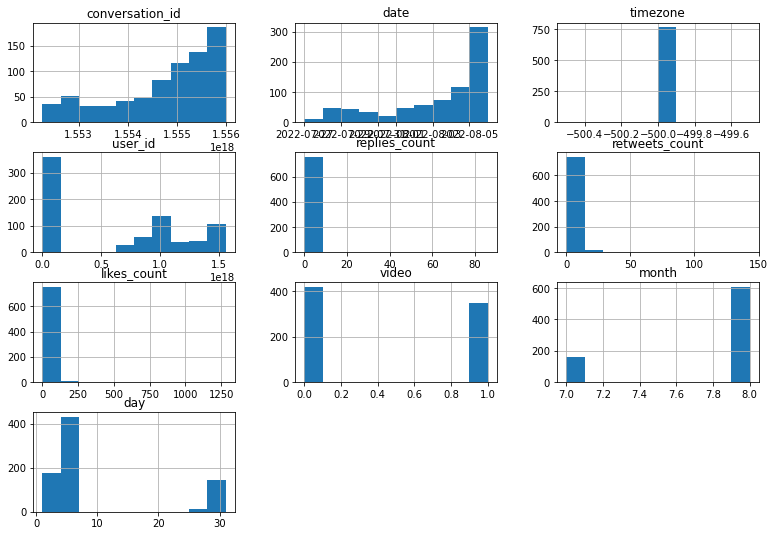

In [16]:
# Non-categorical data
df.hist(bins = 10)
plt.show()

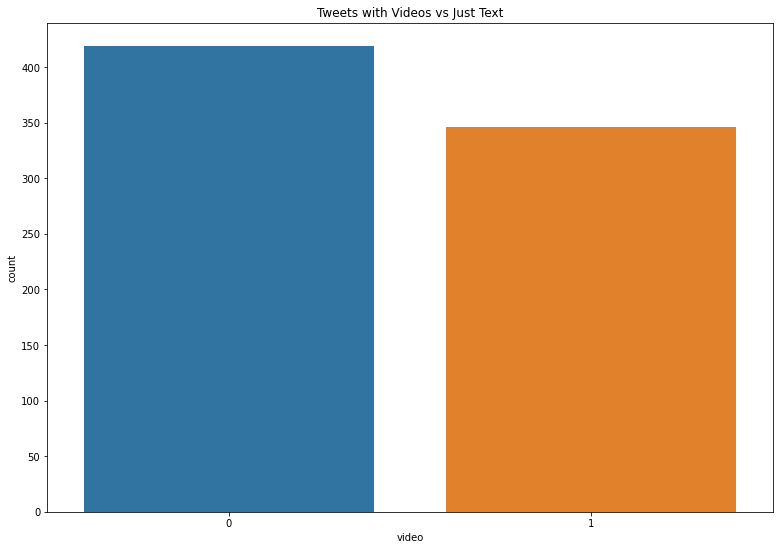

In [17]:
# Tweets with videos
sns.countplot('video', data = df)
plt.title('Tweets with Videos vs Just Text')
plt.show()

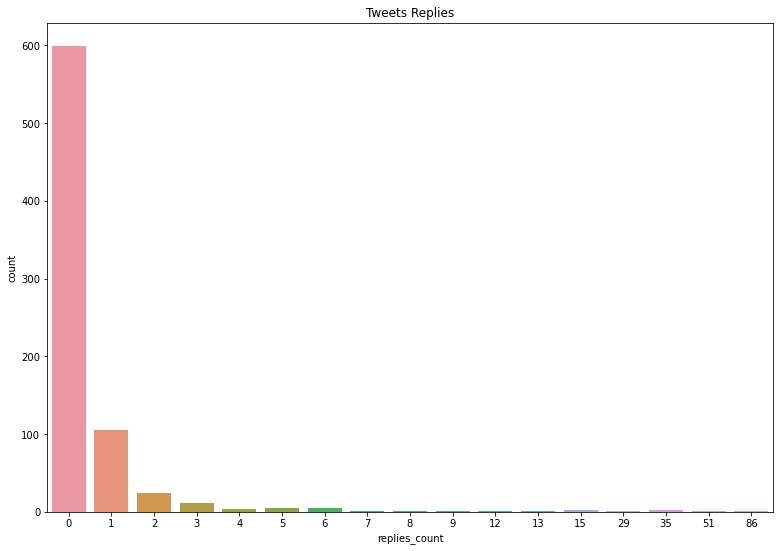

In [18]:
# Tweets with videos
sns.countplot('replies_count', data = df)
plt.title('Tweets Replies')
plt.show()

In [19]:
# Conventionally, more replies imply topic of interest
df.replies_count.value_counts()

0     599
1     105
2      24
3      11
5       5
6       5
4       4
35      2
15      2
51      1
29      1
86      1
12      1
8       1
9       1
7       1
13      1
Name: replies_count, dtype: int64

In [20]:
# Examine tweet with more than 10 replies
replies_over_10 = df[df.replies_count > 10]
replies_over_10

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
59,1555920060551667712,2022-08-06,09:13:44,-500,4284189436,gejonathan,Goodluck E. Jonathan,"Pleased to have linked up with my good friend,...",en,[],[],['https://pbs.twimg.com/media/FZe9B6fXkAAOCXe....,86,120,1281,[],https://twitter.com/GEJonathan/status/15559200...,1,8,6
332,1555254890355728386,2022-08-04,13:10:35,-500,1131859041603469312,ebklegacy,Ernest Bai Koroma,I've launched the joint @_AfricanUnion /#COMES...,en,"[{'screen_name': '_africanunion', 'name': 'afr...",[],['https://pbs.twimg.com/media/FZVgE-7XoAAKrCj....,51,34,404,"['comesa', 'kenyadecides2022']",https://twitter.com/ebklegacy/status/155525489...,1,8,4
346,1555207267397632001,2022-08-04,10:01:21,-500,481442368,husseinbadhaani,Xuseen-Badhaani Cabdi,"Today we are going on trip to Kenya, where we ...",en,[],[],['https://pbs.twimg.com/media/FZU0mVeXwAYqY_1....,15,22,161,['kenyaelections2022'],https://twitter.com/Husseinbadhaani/status/155...,1,8,4
425,1555096451134406659,2022-08-04,02:41:00,-500,1593695947,interiorke,Ministry of Interior,"CS Dr. @FredMatiangi declares Tuesday, 9th Aug...",en,"[{'screen_name': 'fredmatiangi', 'name': ""dr. ...",[],['https://pbs.twimg.com/media/FZTP-aYWAAAGZ5E....,35,128,229,[],https://twitter.com/InteriorKE/status/15550964...,1,8,4
438,1554932464619081729,2022-08-03,15:49:23,-500,464691420,david1mutai,David🦅Mutai📡,David Ndii: “This is why Raila has lost the 20...,en,"[{'screen_name': 'citizentvkenya', 'name': 'ci...",[],[],29,143,589,['jklive'],https://twitter.com/David1Mutai/status/1554932...,1,8,3
570,1554183408846348290,2022-08-01,14:12:54,-500,3034124811,tv47ke,TV47 Kenya,"""Raila Odinga has lost his vital traditional r...",en,"[{'screen_name': 'abouhbakar', 'name': 'abubak...",[],[],12,10,65,"['kenyaelections2022', 'kenyadecides', 'kenyad...",https://twitter.com/tv47ke/status/155418340884...,1,8,1
588,1554072695016493057,2022-08-01,06:52:58,-500,992886834,kimuzi_,Kimuzi,2017 turn out ilikua 77% compared to 2013s 86%...,en,[],[],['https://pbs.twimg.com/media/FZEs3duWIAcxMjB....,15,4,23,[],https://twitter.com/Kimuzi_/status/15540726950...,1,8,1
674,1553033463133081602,2022-07-29,10:03:26,-500,1531253586927263746,bakhita_esther,Bakhita Esther,The hustler nation tuko ready to vote for Ruto...,tl,[],[],['https://pbs.twimg.com/media/FY17stRXwAIkclu....,35,85,1023,"['kenya7s', 'rutothe5th', 'enoughisenough', 'k...",https://twitter.com/bakhita_esther/status/1553...,1,7,29
704,1552885828396978176,2022-07-29,00:16:47,-500,829577236734951424,kadobamosesug,KADOBA MOSES AMOOTI~THE LAST MU'CHWEZI,Kenya abolished car grants and sitting allowan...,en,[],[],['https://pbs.twimg.com/media/FYz1biZXoAAciaG....,13,32,138,[],https://twitter.com/kadobamosesUG/status/15528...,1,7,29


In [21]:
# Tweet
print(replies_over_10.tweet.unique())

["Pleased to have linked up with my good friend, His Excellency Jakaya Kikwete, former President of the Republic of Tanzania, today in Nairobi, where both of us are leading different Election Observation Missions (EOMs) to Kenya's August 9, 2022 general elections. -GEJ  https://t.co/9qmpXQH7bV"
 "I've launched the joint @_AfricanUnion /#COMESA EOM to Kenya's August 2022 elections. We acknowledge the challenges &amp; anxieties relating to peace &amp; security, we are determined to support a violence-free, fair &amp; credible electoral @ZainabHawa  @UnKenya outcome.\xa0#KenyaDecides2022  https://t.co/t8CRa7Uae3"
 'Today we are going on trip to Kenya, where we will participate in the Kenyan General Election as International Observers who are observing the #kenyaelections2022 that will take place on the 9th. August 2022.  https://t.co/4lo6vVmB6C'
 'CS Dr. @FredMatiangi declares Tuesday, 9th August, 2022, as a public holiday to afford the people of Kenya the opportunity to participate in th

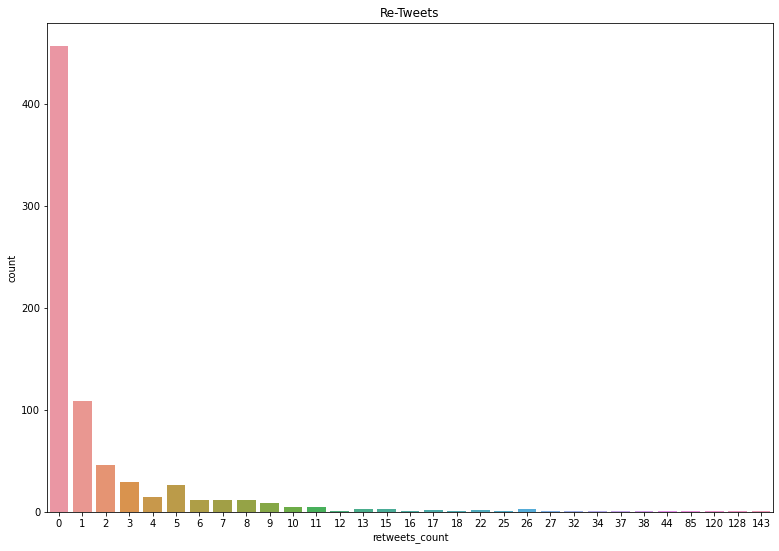

In [22]:
# Tweets with videos
sns.countplot('retweets_count', data = df)
plt.title('Re-Tweets')
plt.show()

In [23]:
# Like replies, examine re-tweets
df.retweets_count.value_counts()

0      456
1      109
2       46
3       30
5       27
4       15
8       12
6       12
7       12
9        9
11       5
10       5
26       3
15       3
13       3
17       2
22       2
18       1
32       1
85       1
25       1
38       1
37       1
128      1
143      1
120      1
27       1
12       1
34       1
16       1
44       1
Name: retweets_count, dtype: int64

In [24]:
# Re-tweets Greater than 100 
retweet_over_10_times = df[df.retweets_count > 10 ]
retweet_over_10_times

,conversation_id,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,video,month,day
59,1555920060551667712,2022-08-06,09:13:44,-500,4284189436,gejonathan,Goodluck E. Jonathan,"Pleased to have linked up with my good friend,...",en,[],[],['https://pbs.twimg.com/media/FZe9B6fXkAAOCXe....,86,120,1281,[],https://twitter.com/GEJonathan/status/15559200...,1,8,6
176,1555652695561838593,2022-08-05,15:31:19,-500,138369105,auc_paps,African Union Political Affairs Peace and Secu...,See link to the Joint pre-election statement b...,en,[],['https://www.peaceau.org/uploads/joint-pre-el...,['https://pbs.twimg.com/media/FZbJ35_XgAEpY99....,6,13,127,['kenya'],https://twitter.com/AUC_PAPS/status/1555652695...,1,8,5
196,1555597216613556224,2022-08-05,11:50:52,-500,821246414,ccgea1,CCG,📌Joint Statement by Embassies and High Commiss...,en,[],[],['https://pbs.twimg.com/media/FZaXafVXoAU6XS5....,1,11,20,"['kenyaelections2022', 'kenyadecides2022', 'ke...",https://twitter.com/ccgea1/status/155559721661...,1,8,5
227,1555567663161696257,2022-08-05,09:53:26,-500,1027944794088239104,africagreens,Greens of Africa Foundation,PEACE! PEACE! PEACE! As Kenya heads to the gen...,en,[],[],['https://pbs.twimg.com/media/FZZ8XuDXoAE0cGu....,0,18,47,[],https://twitter.com/AfricaGreens/status/155556...,1,8,5
298,1555464570562551808,2022-08-05,03:03:47,-500,854673168618934272,dcs_kenya,Directorate of Children Services,Messages for Teachers during the 2022 Election...,en,[],[],['https://pbs.twimg.com/media/FZYegBvXoAIadDC....,1,11,19,"['keepchildrensafeduringelections', 'kenyadeci...",https://twitter.com/DCS_Kenya/status/155546457...,1,8,5
300,1555461200787406850,2022-08-05,02:50:23,-500,1061327290796269570,owichbrio,OWICH,"The 2022 elections in Kenya are coming up, and...",en,[],[],['https://pbs.twimg.com/media/FZYbr5XWYAIQmDK....,1,11,5,['mabadiliko'],https://twitter.com/OwichBrio/status/155546120...,1,8,5
307,1555440169687318529,2022-08-05,01:26:49,-500,4859368672,twaweza_ke,Twaweza Kenya,A large majority of citizens are aware of key ...,en,[],[],['https://pbs.twimg.com/media/FZYIfPhXwAAP5dm....,0,15,18,['sautizawananchi'],https://twitter.com/Twaweza_Ke/status/15554401...,1,8,5
312,1555423273323823104,2022-08-05,00:19:41,-500,854673168618934272,dcs_kenya,Directorate of Children Services,Messages for Politicians during the 2022 Elect...,en,[],[],['https://pbs.twimg.com/media/FZX4mgZWAAAZZMS....,1,16,15,"['keepchildrensafeduringelections', 'kenyadeci...",https://twitter.com/DCS_Kenya/status/155542327...,1,8,5
332,1555254890355728386,2022-08-04,13:10:35,-500,1131859041603469312,ebklegacy,Ernest Bai Koroma,I've launched the joint @_AfricanUnion /#COMES...,en,"[{'screen_name': '_africanunion', 'name': 'afr...",[],['https://pbs.twimg.com/media/FZVgE-7XoAAKrCj....,51,34,404,"['comesa', 'kenyadecides2022']",https://twitter.com/ebklegacy/status/155525489...,1,8,4
346,1555207267397632001,2022-08-04,10:01:21,-500,481442368,husseinbadhaani,Xuseen-Badhaani Cabdi,"Today we are going on trip to Kenya, where we ...",en,[],[],['https://pbs.twimg.com/media/FZU0mVeXwAYqY_1....,15,22,161,['kenyaelections2022'],https://twitter.com/Husseinbadhaani/status/155...,1,8,4


In [25]:
# Message
retweet_over_10_times.tweet

59     Pleased to have linked up with my good friend,...
176    See link to the Joint pre-election statement b...
196    📌Joint Statement by Embassies and High Commiss...
227    PEACE! PEACE! PEACE! As Kenya heads to the gen...
298    Messages for Teachers during the 2022 Election...
300    The 2022 elections in Kenya are coming up, and...
307    A large majority of citizens are aware of key ...
312    Messages for Politicians during the 2022 Elect...
332    I've launched the joint @_AfricanUnion /#COMES...
346    Today we are going on trip to Kenya, where we ...
349    EACC has UNVEILED its 8th Edition of the SPEAR...
356    Today, @IEBCKenya conducted a press briefing w...
361    Distinguished panelists @JeniferShamalla, @SFC...
422    JUST IN:  CS Dr. Fred Matiang'i declares Tuesd...
425    CS Dr. @FredMatiangi declares Tuesday, 9th Aug...
430    Messages for Community Leaders during the 2022...
438    David Ndii: “This is why Raila has lost the 20...
452    As we gear up for #GE202

### Bivariate Features

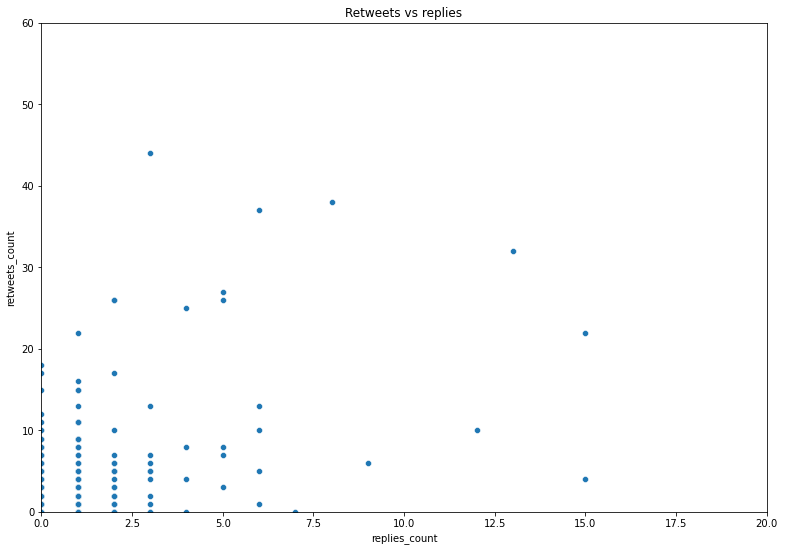

In [26]:
# Retweets with videos

sns.scatterplot(data = df, y = 'retweets_count', x = 'replies_count')
plt.xlim(0, 20)
plt.ylim(0, 60)
plt.title('Retweets vs replies')


None

### Multi-variate Features

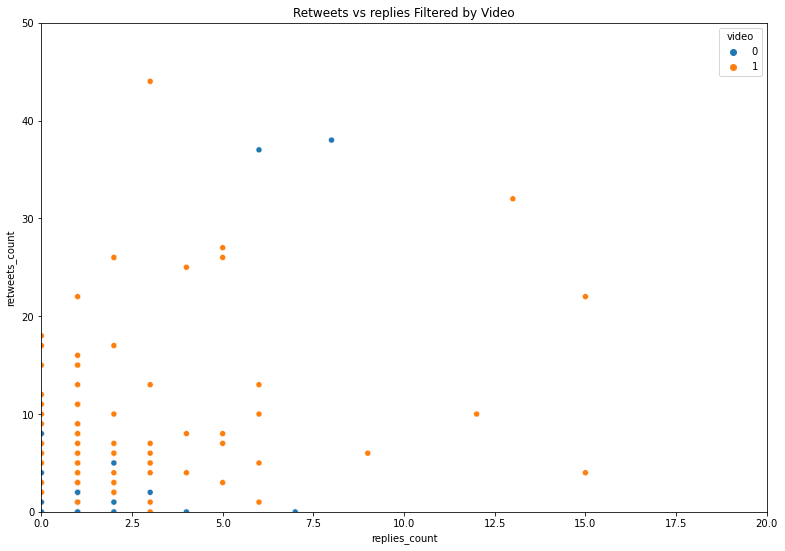

In [27]:
# Retweets vs replies with videos

sns.scatterplot(data = df, y = 'retweets_count', x = 'replies_count', hue = 'video')
plt.xlim(0, 20)
plt.ylim(0, 50)
plt.title('Retweets vs replies Filtered by Video')

None

For purpose of time, this mini-project will limit visual exploration for future discoveries

### Tokenize Words

Break words and any punctuation left over into discrete units.

In [28]:
def tokenize_tweets(text):
    
    tokenizer = ToktokTokenizer()
    
    return tokenizer.tokenize(text, return_str = True)
    
df['tweet'] = df['tweet'].apply (lambda x: tokenize_tweets(x.lower()))

### Remove Stopwords

Stop words dont add any value to our analysis, hence no need/ Stipped.

In [29]:
stop_words = stopwords.words('english')


df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

### Stemming/ Lemmatize

In [30]:
def stemmer(text):
    
    ps = PorterStemmer()
    
    return ps.stem(text)

def lemmatize(text):
    
    wnl = WordNetLemmatizer()
    
    return wnl.lemmatize(text)

df['tweet'] = df['tweet'].apply(lambda x: stemmer(x))
df['tweet'] = df['tweet'].apply(lambda x: lemmatize(x))

### Word Count

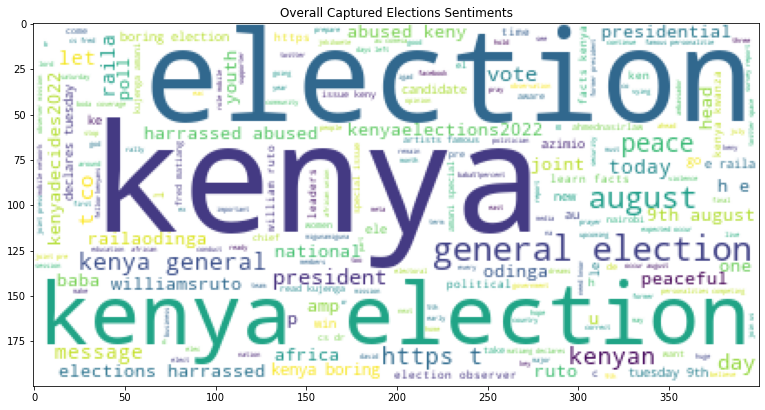

In [31]:
# Convert tweets to string
tweets_list = df.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Overall Captured Elections Sentiments')
plt.show()

### Word Cloud with 10+ Replies (Can be infered as most popular sentiments)

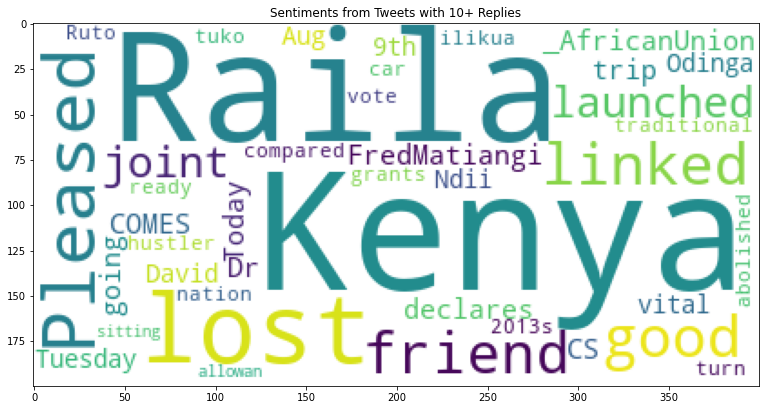

In [32]:
# Convert tweets to string
tweets_list = replies_over_10.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Sentiments from Tweets with 10+ Replies')
plt.show()

### Tweets with Retweets over 10 Times

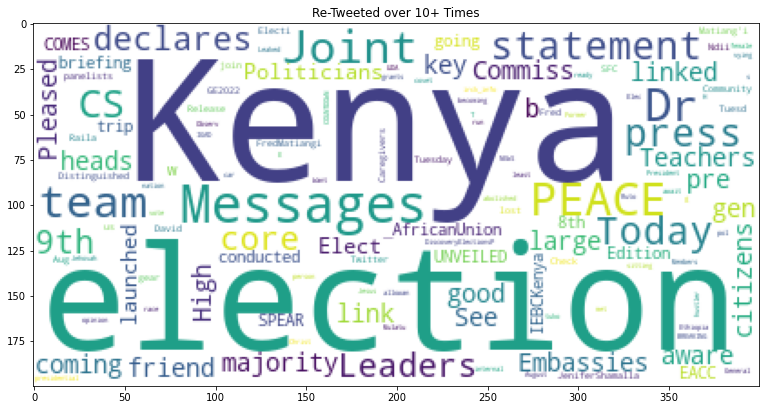

In [33]:
# Convert tweets to string
tweets_list = retweet_over_10_times.loc[:, 'tweet'].to_string()

# Generate WordCloud
img = WordCloud(background_color='white').generate(tweets_list)
plt.imshow(img)
plt.title('Re-Tweeted over 10+ Times')
plt.show()

## Project on-going and current as of July 27, 2022
- Improvements:
    - Implement time series analysis
    - Bigrams
    - Get more data greater than a week
    - Get insight on candidates (Search frequency of candidates)

# Week-by-Week Tweet Analysis 